In [0]:
import tensorflow as tf
#from tensorflow import keras
#from keras import layers
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
import numpy as np

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-06-05 11:38:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  59.1MB/s    in 3.2s    

2020-06-05 11:38:58 (59.1 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-06-05 11:39:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rp

In [0]:
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
train_dir = '/tmp/rps'
val_dir = '/tmp/rps-test-set'

im_rock = len(os.listdir(os.path.join(train_dir,'rock'))) # total images of rock
print(im_rock)

rock_name = os.listdir(os.path.join(train_dir,r'rock'))
paper_name = os.listdir(os.path.join(train_dir,r'paper'))
scissor_name = os.listdir(os.path.join(train_dir,r'scissors'))

vrock_name = os.listdir(os.path.join(val_dir,r'rock'))
vpaper_name = os.listdir(os.path.join(val_dir,r'paper'))
vscissor_name = os.listdir(os.path.join(val_dir,r'scissors'))

840


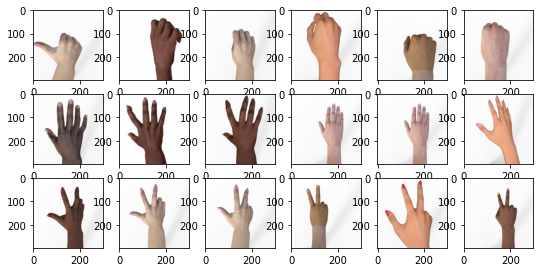

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.gcf()
fig.set_size_inches(9,9)
num_pics = 4

rock_pics = [os.path.join(os.path.join(train_dir,r'rock'),fname) for fname in rock_name[num_pics-3:num_pics]] + [os.path.join(os.path.join(val_dir,r'rock'),fname) for fname in vrock_name[num_pics-3:num_pics]]
paper_pics = [os.path.join(os.path.join(train_dir,r'paper'),fname) for fname in paper_name[num_pics-3:num_pics]] + [os.path.join(os.path.join(val_dir,r'paper'),fname) for fname in vpaper_name[num_pics-3:num_pics]]
scissor_pics = [os.path.join(os.path.join(train_dir,r'scissors'),fname) for fname in scissor_name[num_pics-3:num_pics]] + [os.path.join(os.path.join(val_dir,r'scissors'),fname) for fname in vscissor_name[num_pics-3:num_pics]]

for i,im in enumerate(rock_pics+paper_pics+scissor_pics):
    ax = plt.subplot(6,6,i+1)
    #print(im)
    img = mpimg.imread(im)
    plt.imshow(img)
plt.show()

In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet_model = ResNet50(input_shape = (150,150,3),
                       include_top = False,
                       weights = 'imagenet')
resnet_model.trainable = False
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
last_layer = resnet_model.get_layer('conv5_block3_2_relu')
X = tf.keras.layers.Flatten()(last_layer.output)
resnet_model = tf.keras.Model(resnet_model.input,X)
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:
model = tf.keras.Sequential([resnet_model,
                          #tf.keras.layers.Flatten(),
                          tf.keras.layers.Dropout(0.2),
                          tf.keras.layers.Dense(512,activation = 'relu'),
                          tf.keras.layers.Dense(3,activation = 'softmax')])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 12800)             22528896  
_________________________________________________________________
dropout (Dropout)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               6554112   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 29,084,547
Trainable params: 6,555,651
Non-trainable params: 22,528,896
_________________________________________________________________


In [0]:
class CALLBACK(tf.keras.callbacks.Callback):
    def at_the_end(self,epoch,log = {}):
        if log.get('accuracy') > 0.98:
            print("\n accuracy reached 98% stopping training ...")
            self.model.stop_training = True

In [13]:
optmz = tf.keras.optimizers.RMSprop(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy',
             optimizer = optmz,
             metrics = ['accuracy'])

train_data_gen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   rotation_range = 40,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_data_gen = ImageDataGenerator(rescale = 1/255)

train_gen = train_data_gen.flow_from_directory(train_dir,
                                              target_size = (150,150),
                                              class_mode = 'categorical',
                                              batch_size = 126) # total images in set = 840x3
val_gen = val_data_gen.flow_from_directory(val_dir,
                                          target_size = (150,150),
                                          class_mode = 'categorical',
                                          batch_size = 12) # total images in set = 124x3

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [14]:
callback = CALLBACK()
history = model.fit_generator(train_gen,
                             epochs = 25,
                             steps_per_epoch = 20,
                             validation_data = val_gen,
                             verbose = 1,
                             validation_steps = 31,
                             callbacks = [callback]) 

Epoch 1/25
20/20 [==============================] - 22s 1s/step - loss: 1.3927 - accuracy: 0.4921 - val_loss: 0.9764 - val_accuracy: 0.4247
Epoch 2/25
20/20 [==============================] - 20s 1s/step - loss: 1.0536 - accuracy: 0.5218 - val_loss: 0.9883 - val_accuracy: 0.3871
Epoch 3/25
20/20 [==============================] - 20s 1s/step - loss: 0.9970 - accuracy: 0.5234 - val_loss: 1.0965 - val_accuracy: 0.3387
Epoch 4/25
20/20 [==============================] - 20s 1s/step - loss: 1.0288 - accuracy: 0.5107 - val_loss: 0.8502 - val_accuracy: 0.5108
Epoch 5/25
20/20 [==============================] - 20s 1s/step - loss: 0.9377 - accuracy: 0.5583 - val_loss: 1.2362 - val_accuracy: 0.4005
Epoch 6/25
20/20 [==============================] - 20s 1s/step - loss: 0.9118 - accuracy: 0.5829 - val_loss: 1.0393 - val_accuracy: 0.3602
Epoch 7/25
20/20 [==============================] - 20s 1s/step - loss: 0.9079 - accuracy: 0.5710 - val_loss: 1.0578 - val_accuracy: 0.5215
Epoch 8/25
20/20 [==

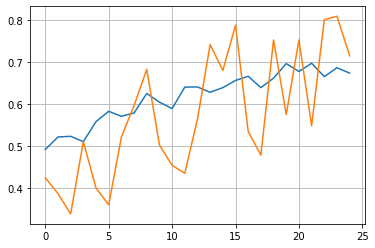

In [16]:
acc = history.history.get('accuracy')
val_acc = history.history.get('val_accuracy')
plt.plot(range(len(acc)),acc)
plt.plot(range(len(acc)),val_acc)
plt.grid('on')

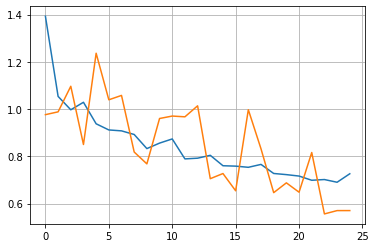

In [17]:
loss = history.history.get('loss')
val_loss = history.history.get('val_loss')
plt.plot(range(len(loss)),loss)
plt.plot(range(len(loss)),val_loss)
plt.grid('on')

**The above model didn't get an accuracy we though it would**


1.   The ResNet model might be trained on a different training set 
2.   Our hyperparameter tuning was not correct 

Now if our model was trained on different set what we can do is try to work on fine tuning our model for better results





In [18]:
resnet_model.trainable = True
model.summary() # this will have non trainable parameters to the value which were originally present

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 12800)             22528896  
_________________________________________________________________
dropout (Dropout)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               6554112   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 29,084,547
Trainable params: 29,035,523
Non-trainable params: 49,024
_________________________________________________________________


In [19]:
# fine tuning only layers after 100th layer : 
for layer in resnet_model.layers[:100]:
  layer.trainable =  False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 12800)             22528896  
_________________________________________________________________
dropout (Dropout)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               6554112   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 29,084,547
Trainable params: 24,953,859
Non-trainable params: 4,130,688
_________________________________________________________________


In [20]:
# training again: 
optmz = tf.keras.optimizers.RMSprop(learning_rate = 0.0001) # * fine tuning should be done at a tenth of previous learning rate because it might result in large gradients in prev layers
model.compile(loss = 'categorical_crossentropy',
             optimizer = optmz,
             metrics = ['accuracy'])
epochs = 25 + 20 # previous epochs + fine tune epochs 
history = model.fit_generator(train_gen,
                             epochs = epochs,
                             initial_epoch =  history.epoch[-1], # means start from the last epoch
                             steps_per_epoch = 20,
                             validation_data = val_gen,
                             verbose = 1,
                             validation_steps = 12,
                             callbacks = [callback]) 

Epoch 25/45
20/20 [==============================] - 21s 1s/step - loss: 2.2581 - accuracy: 0.5778 - val_loss: 1.0593 - val_accuracy: 0.4444
Epoch 26/45
20/20 [==============================] - 21s 1s/step - loss: 0.5083 - accuracy: 0.7857 - val_loss: 1.0903 - val_accuracy: 0.4028
Epoch 27/45
20/20 [==============================] - 21s 1s/step - loss: 0.4358 - accuracy: 0.8210 - val_loss: 0.9219 - val_accuracy: 0.6042
Epoch 28/45
20/20 [==============================] - 21s 1s/step - loss: 0.2651 - accuracy: 0.8925 - val_loss: 0.9454 - val_accuracy: 0.3958
Epoch 29/45
20/20 [==============================] - 21s 1s/step - loss: 0.2595 - accuracy: 0.9103 - val_loss: 0.8689 - val_accuracy: 0.5694
Epoch 30/45
20/20 [==============================] - 21s 1s/step - loss: 0.2624 - accuracy: 0.9214 - val_loss: 0.6452 - val_accuracy: 0.6944
Epoch 31/45
20/20 [==============================] - 21s 1s/step - loss: 0.1800 - accuracy: 0.9409 - val_loss: 0.9626 - val_accuracy: 0.6250
Epoch 32/45
2

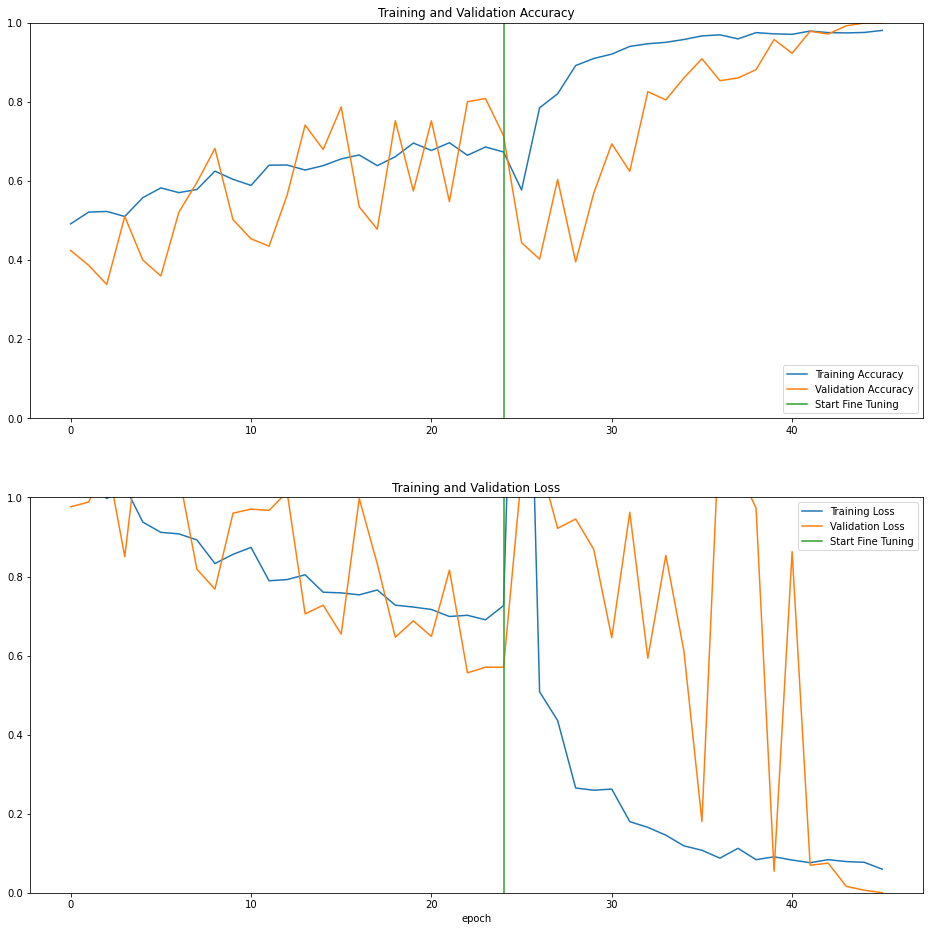

In [24]:
plt.figure(figsize=(16, 16))
plt.subplot(2, 1, 1)
#acc += history.history.get('accuracy')
#val_acc += history.history.get('val_accuracy')
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([24,24], # since it ends at 24 i.e. before fine tuning
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
axes = plt.gca()
axes.set_ylim([0,1])


plt.subplot(2, 1, 2)
#loss += history.history.get('loss')
#val_loss += history.history.get('val_loss')
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([24,24],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

**thus fine-tuning did make model have better accuracy and the overfitting also reduced at the end so the model worked better on fine tuning it !!**